In [109]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np




In [110]:
data_before_remove_first_column = pd.read_csv('data_2.csv')
data_norm = data_before_remove_first_column.iloc[:, 1:]

In [111]:
data_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5252 entries, 0 to 5251
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     5252 non-null   float64
 1   Graduated               5252 non-null   int64  
 2   Profession              5252 non-null   float64
 3   Work_Experience         5252 non-null   float64
 4   Family_Size             5252 non-null   float64
 5   Var_1                   5252 non-null   float64
 6   Gender_Female           5252 non-null   float64
 7   Gender_Male             5252 non-null   float64
 8   Ever_Married_No         5252 non-null   float64
 9   Ever_Married_Yes        5252 non-null   float64
 10  Spending_Score_Average  5252 non-null   float64
 11  Spending_Score_High     5252 non-null   float64
 12  Spending_Score_Low      5252 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 533.5 KB


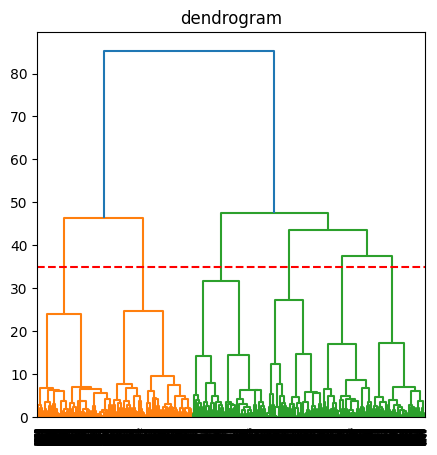

In [115]:
## break
plt.figure(figsize=(5,5))
plt.title('dendrogram')
plt.xticks(rotation=90)
dend = shc.dendrogram(shc.linkage(data_norm, method="ward"))
plt.axhline(y=35, color= "red", linestyle="--")


In [113]:
pca = PCA(n_components=2)

reduced_data = pca.fit_transform(data_norm)

this is without the legend

In [ ]:
# train model
cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster.fit_predict(reduced_data)

# Count the number of data points in each cluster
unique_labels, counts = np.unique(cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of customer segmentation')
plt.show()

# Print the counts of data points in each cluster
for label, count in cluster_counts.items():
    print(f'Cluster {label}: {count} data points')

this is with the legend

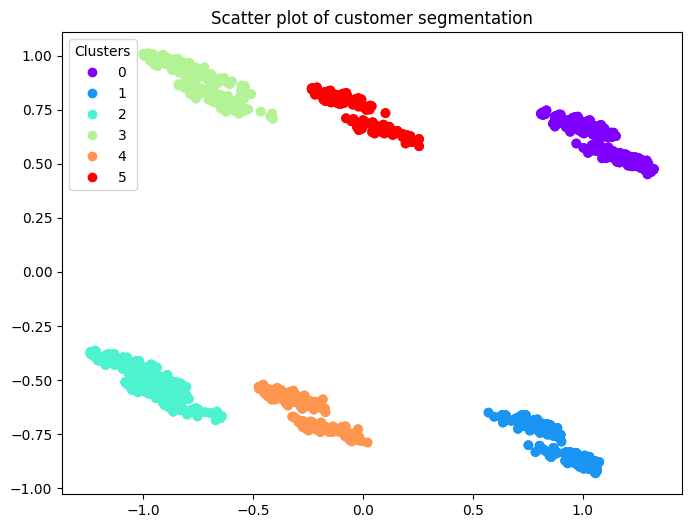

Cluster 0: 1100 data points
Cluster 1: 1014 data points
Cluster 2: 1159 data points
Cluster 3: 862 data points
Cluster 4: 674 data points
Cluster 5: 443 data points


In [119]:
# train model
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')
cluster.fit_predict(reduced_data)

# Count the number of data points in each cluster
unique_labels, counts = np.unique(cluster.labels_, return_counts=True)
cluster_counts = dict(zip(unique_labels, counts))

# Visualize the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x=reduced_data[:, 0], y=reduced_data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot of customer segmentation')

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Print the counts of data points in each cluster
for label, count in cluster_counts.items():
    print(f'Cluster {label}: {count} data points')